In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [33]:
# Generate Synthetic data   
# x1= area , x2 = bedrooms 

np.random.seed(42)
n_samples= 100

# Random sizes between 1000 and 3000 sqft
x1 = np.random.rand(n_samples,1)*2000+1000

# Random bedrooms between 1 to 5 
x2 = np.random.randint(1, 6, size = (n_samples,1))
X = np.hstack((x1, x2))


# True weight , bias and some noise 
true_w = np.array([[300], [15000]])
true_b = 50000
noise = np.random.randn(n_samples, 1)*10000

#actual prices 
y = np.dot( X , true_w) + true_b + noise

# Feature Scaling , normalize data 
# problem is the size is massive and the bedrooms are tiny so we need to normalize the data first using z-score normalization
mean = np.mean(X , axis=0)
std = np.std(X , axis=0)
X_scaled = (X-mean) / std


#Initialisation 
#Weight matrix must match the shape of features and that is the area and bedrooms so the (2, 1)
w = np.zeros((2,1))
b = 0.0
learning_rate = 0.01
epochs = 1000
n = n_samples
loss_history = []


#Gradient descent (vectorized)

for i in range(epochs):

    # forward pass prediction using dot product
    # (100,2) dot (2,1) -> (100,1)
    y_pred = np.dot(X_scaled , w) + b 

    # calculate loss 
    error = y_pred - y 
    loss = np.mean(error**2)
    loss_history.append(loss)


    #backward pass (Gradients)
    dw = (2/n)*np.dot(X_scaled.T , error)
    db = (2/n)*np.sum(error)

    #Update Parameters 
    w = w- learning_rate * dw 
    b = b- learning_rate * db

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss} , w: {w.T}, b: {b}")


Epoch 0, Loss: 487883611465.35333 , w: [[3609.6314357   979.05685748]], b: 13487.44911118422
Epoch 100, Loss: 8660331220.41669 , w: [[153820.44578983  25658.8365783 ]], b: 586726.1795065728
Epoch 200, Loss: 261925262.01792377 , w: [[173705.45243109  22546.20860411]], b: 662748.8453532811
Epoch 300, Loss: 110624536.65599094 , w: [[176616.32106954  21243.84663029]], b: 672830.9375358067
Epoch 400, Loss: 107800650.86100277 , w: [[177079.38845085  20935.03844749]], b: 674168.0201235436
Epoch 500, Loss: 107745130.58319405 , w: [[177157.49021777  20871.73046467]], b: 674345.3434225239
Epoch 600, Loss: 107743954.03854412 , w: [[177171.15292509  20859.4865126 ]], b: 674368.859959684
Epoch 700, Loss: 107743926.59804836 , w: [[177173.59404192  20857.1814574 ]], b: 674371.9787123986
Epoch 800, Loss: 107743925.88865586 , w: [[177174.03532218  20856.75322574]], b: 674372.3923199984
Epoch 900, Loss: 107743925.86856502 , w: [[177174.11559637  20856.67420294]], b: 674372.4471724549


In [ ]:
new_house = np.array([[2000,3]])
new_house_scaled = (new_house - mean) / std
predicted_price = np.dot(new_house_scaled , w) + b
print("Predicted Price:", predicted_price[0][0])

Predicted Price: 693568.2333796528


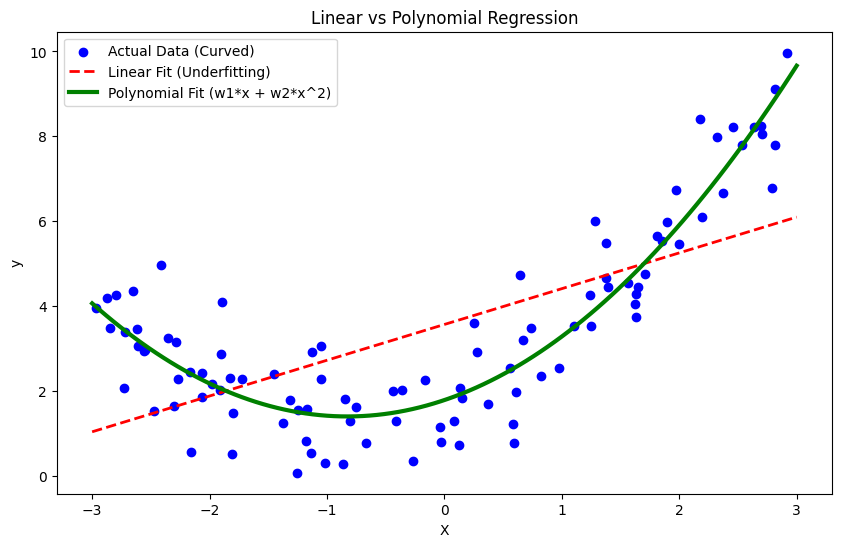

Linear Model Weights: [3.56401543 0.84362064]
Polynomial Model Weights (Bias, w1, w2): [1.78134581 0.93366893 0.56456263]


In [54]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Generate Non-Linear Data (Parabola)
# y = 0.5x^2 + x + 2
m = 100
X = 6 * np.random.rand(m, 1) - 3  # X values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # Quadratic equation with noise

# --- ATTEMPT 1: Linear Regression (The Failure) ---
# We try to fit a curve with a straight line.
# Model: y = wx + b
X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
theta_linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Normal Equation for speed

# --- ATTEMPT 2: Polynomial Regression (The Fix) ---
# We MANUALLY create the x^2 feature
# Model: y = w1*x + w2*x^2 + b
X_square = X ** 2
# STACK them: Column 1 is x, Column 2 is x^2
X_poly = np.column_stack((X, X_square))

# SCALE the features (Critical for Gradient Descent, though Normal Eq handles it here)
# Let's use the closed-form solution (Normal Equation) to skip the epoch loop for simplicity
# This finds the mathematical perfect weights instantly.
X_poly_b = np.c_[np.ones((m, 1)), X_poly] # Add bias column
theta_poly = np.linalg.inv(X_poly_b.T.dot(X_poly_b)).dot(X_poly_b.T).dot(y)

# --- Visualization ---
# Create a range of X values to plot the lines smoothly
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = np.column_stack((X_new, X_new**2)) # Transform test data too!

# Predict
X_new_b = np.c_[np.ones((100, 1)), X_new]
y_predict_linear = X_new_b.dot(theta_linear)

X_new_poly_b = np.c_[np.ones((100, 1)), X_new_poly]
y_predict_poly = X_new_poly_b.dot(theta_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data (Curved)')
plt.plot(X_new, y_predict_linear, 'r--', linewidth=2, label='Linear Fit (Underfitting)')
plt.plot(X_new, y_predict_poly, 'g-', linewidth=3, label='Polynomial Fit (w1*x + w2*x^2)')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()

print("Linear Model Weights:", theta_linear.flatten())
print("Polynomial Model Weights (Bias, w1, w2):", theta_poly.flatten())